In [ ]:
#Installation of libraries
%pip install -q tensorflow keras numpy matplotlib

# With the libraries installed, let's import them.

In [ ]:
#Importing Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Dataset Introduction
The FashionMNIST dataset is a variant of the MNIST dataset, which is often used as the "Hello, World!" of Machine Learning. Instead of handwritten digits, FashionMNIST has grayscale images of 10 apparel categories. Each image has a low resolution (28 by 28 pixels). Let's load the dataset and see some examples.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set format: (60000, 28, 28), labels: (60000,)
Training set format: (10000, 28, 28), labels: (10000,)


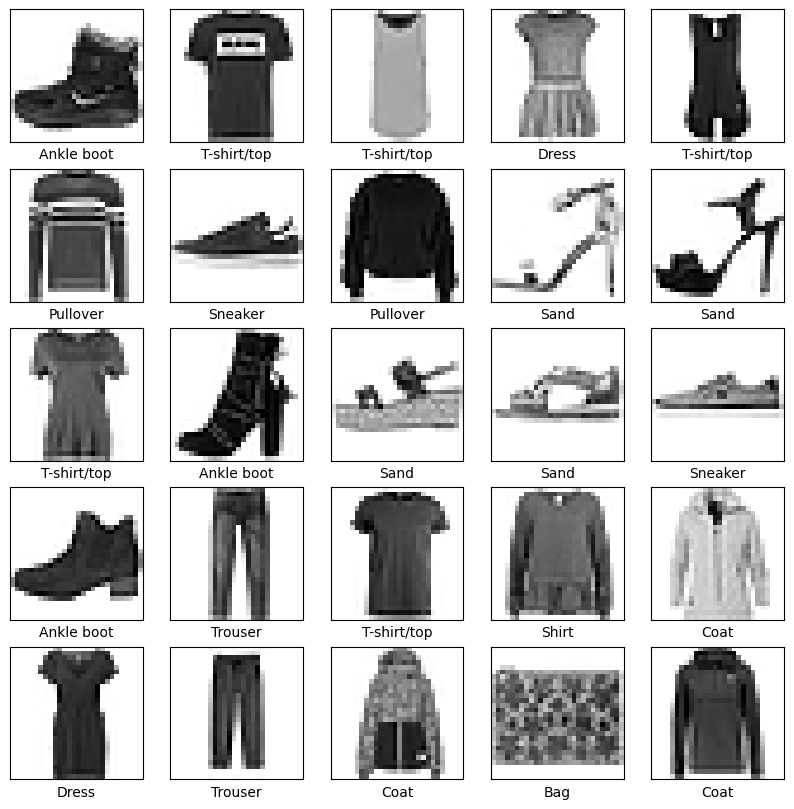

In [ ]:
# Cell 4: Load the dataset
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Label mapping for class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sand', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Verify dataset format
print(f"Training set format: {train_images.shape}, labels: {train_labels.shape}")
print(f"Training set format: {test_images.shape}, labels: {test_labels.shape}")

# Show the first 25 images of the training set
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


# Introduction to model building
Let's now create our convolutional neural network (CNN). A CNN is composed of a series of convolution and pooling layers, followed by dense layers that perform the final classification. Let's use the functional Keras API to build our model.

In [ ]:
# Model building

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images so they have a single color channel
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Configure Input
inputs = Input(shape=(28, 28, 1))

# First layer of convolution and pooling
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)

# First layer of convolution and pooling
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# Flattening the outlet to feed the dense layers
x = Flatten()(x)

# Dense layer and Output layer
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Higher dropout rate for dense layer

 # Output Layer
outputs = Dense(10, activation='softmax')(x)

# Create the template
model = Model(inputs=inputs, outputs=outputs)

#show template summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# **Model compilation
Before we train the model, we need to compile it. During the build, we define the optimizer that will adjust the network weights during the workout, the loss function that will be minimized by the optimizer, and the metrics that we would like to track during the workout.**

In [ ]:
# Model compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
Let's now train the model. During training, the model will iterate multiple times (epochs) over the training set and adjust the net weights to minimize the loss function. After each season, we will validate the performance of the model in the test set.

In [ ]:
# Model training
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1026 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1012 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.1011 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0995 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1013 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1006 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0984 - loss: 2.3028 

Text(0.5, 1.0, 'Loss evolution')

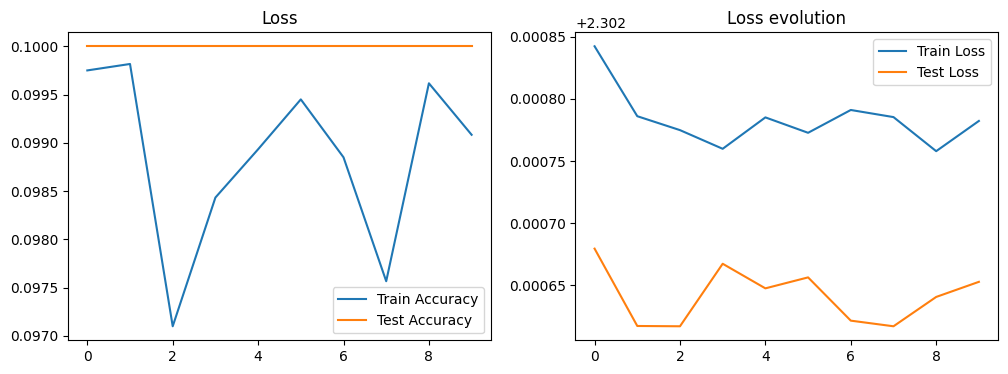

In [ ]:
# ModelPerformance View
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss evolution')